In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfdf
from matplotlib import pyplot as plt

In [ ]:
ds=tfdf.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFALPG3/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFALPG3/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
ds.as_numpy_iterator().next()['label']

2

In [ ]:
import numpy as np

In [ ]:
dataiterator=ds.as_numpy_iterator()

In [ ]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [ ]:
ax

array([<Axes: title={'center': '1'}>, <Axes: title={'center': '8'}>,
       <Axes: title={'center': '4'}>, <Axes: title={'center': '1'}>],
      dtype=object)

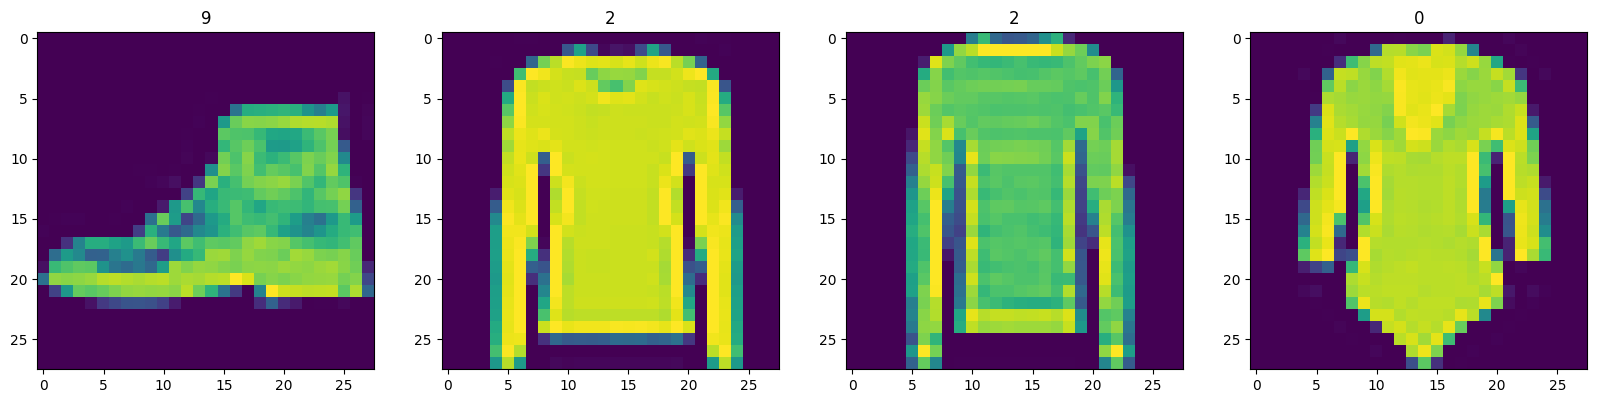

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  batch=dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [ ]:
def scale_image(data):
  image=data['image']
  return image/255

In [ ]:
ds=ds.map(scale_image)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [ ]:
def build_generator():
  model=Sequential()
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))
  return model

In [ ]:
generator=build_generator()

In [ ]:
generator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_7 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [ ]:
img=generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 0s 21ms/step


array([[[[0.5011048 ],
         [0.50279087],
         [0.5010725 ],
         ...,
         [0.5012944 ],
         [0.4980326 ],
         [0.49983257]],

        [[0.4833797 ],
         [0.48766667],
         [0.48664746],
         ...,
         [0.50046283],
         [0.49850222],
         [0.49958965]],

        [[0.4801502 ],
         [0.4886724 ],
         [0.49186072],
         ...,
         [0.49826357],
         [0.49858305],
         [0.49947876]],

        ...,

        [[0.49475053],
         [0.50502646],
         [0.5012785 ],
         ...,
         [0.4909968 ],
         [0.49363738],
         [0.5001891 ]],

        [[0.49473932],
         [0.5036251 ],
         [0.50303084],
         ...,
         [0.49688622],
         [0.49893144],
         [0.5016534 ]],

        [[0.49406204],
         [0.49284256],
         [0.48791924],
         ...,
         [0.49731275],
         [0.4993036 ],
         [0.5006442 ]]],


       [[[0.50321776],
         [0.49707788],
         [0.50

In [ ]:
img.shape

(4, 28, 28, 1)

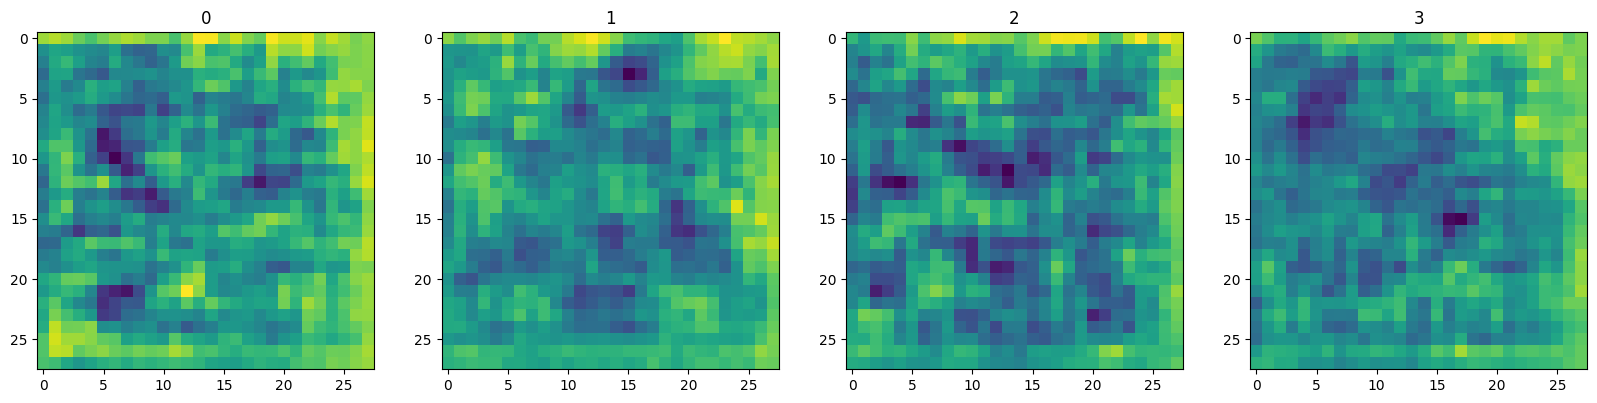

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

In [ ]:
def build_discriminator():
  model=Sequential()

  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [ ]:
discriminator=build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_8 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)      

In [ ]:
img.shape

(28, 28, 1)

In [ ]:
discriminator.predict(np.expand_dims(img,0))    #for classifying a single img

1/1 [==============================] - 1s 690ms/step


array([[0.49363273]], dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):

  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.generator=generator
    self.discriminator=discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss

  def train_step(self, batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        with tf.GradientTape() as d_tape:

            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        with tf.GradientTape() as g_tape:

            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            predicted_labels = self.discriminator(gen_images, training=False)

            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
fashgan=FashionGAN(generator,discriminator)


In [ ]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist=fashgan.fit(ds,epochs=20,callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 93s 169ms/step - d_loss: 0.5054 - g_loss: 1.0070
Epoch 2/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.4207 - g_loss: 4.3020
Epoch 3/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.2800 - g_loss: 7.0529
Epoch 4/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.4110 - g_loss: 5.0192
Epoch 5/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.4433 - g_loss: 1.8563
Epoch 6/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.5910 - g_loss: 0.5386
Epoch 7/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.3855 - g_loss: 0.1264
Epoch 8/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.5090 - g_loss: 0.1399
Epoch 9/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.6981 - g_loss: 0.6155
Epoch 10/20
469/469 [==============================] - 78s 166ms/step - d

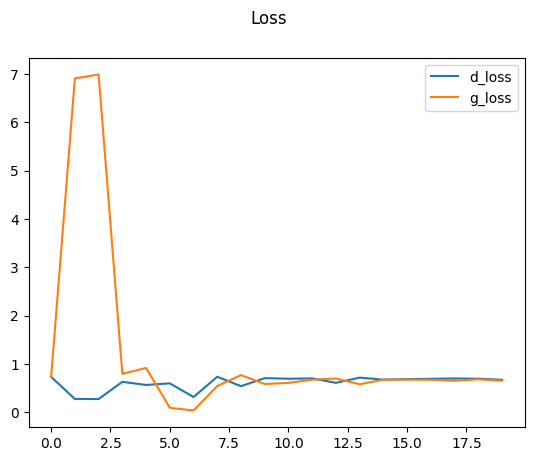

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

##Testing

1/1 [==============================] - 0s 28ms/step


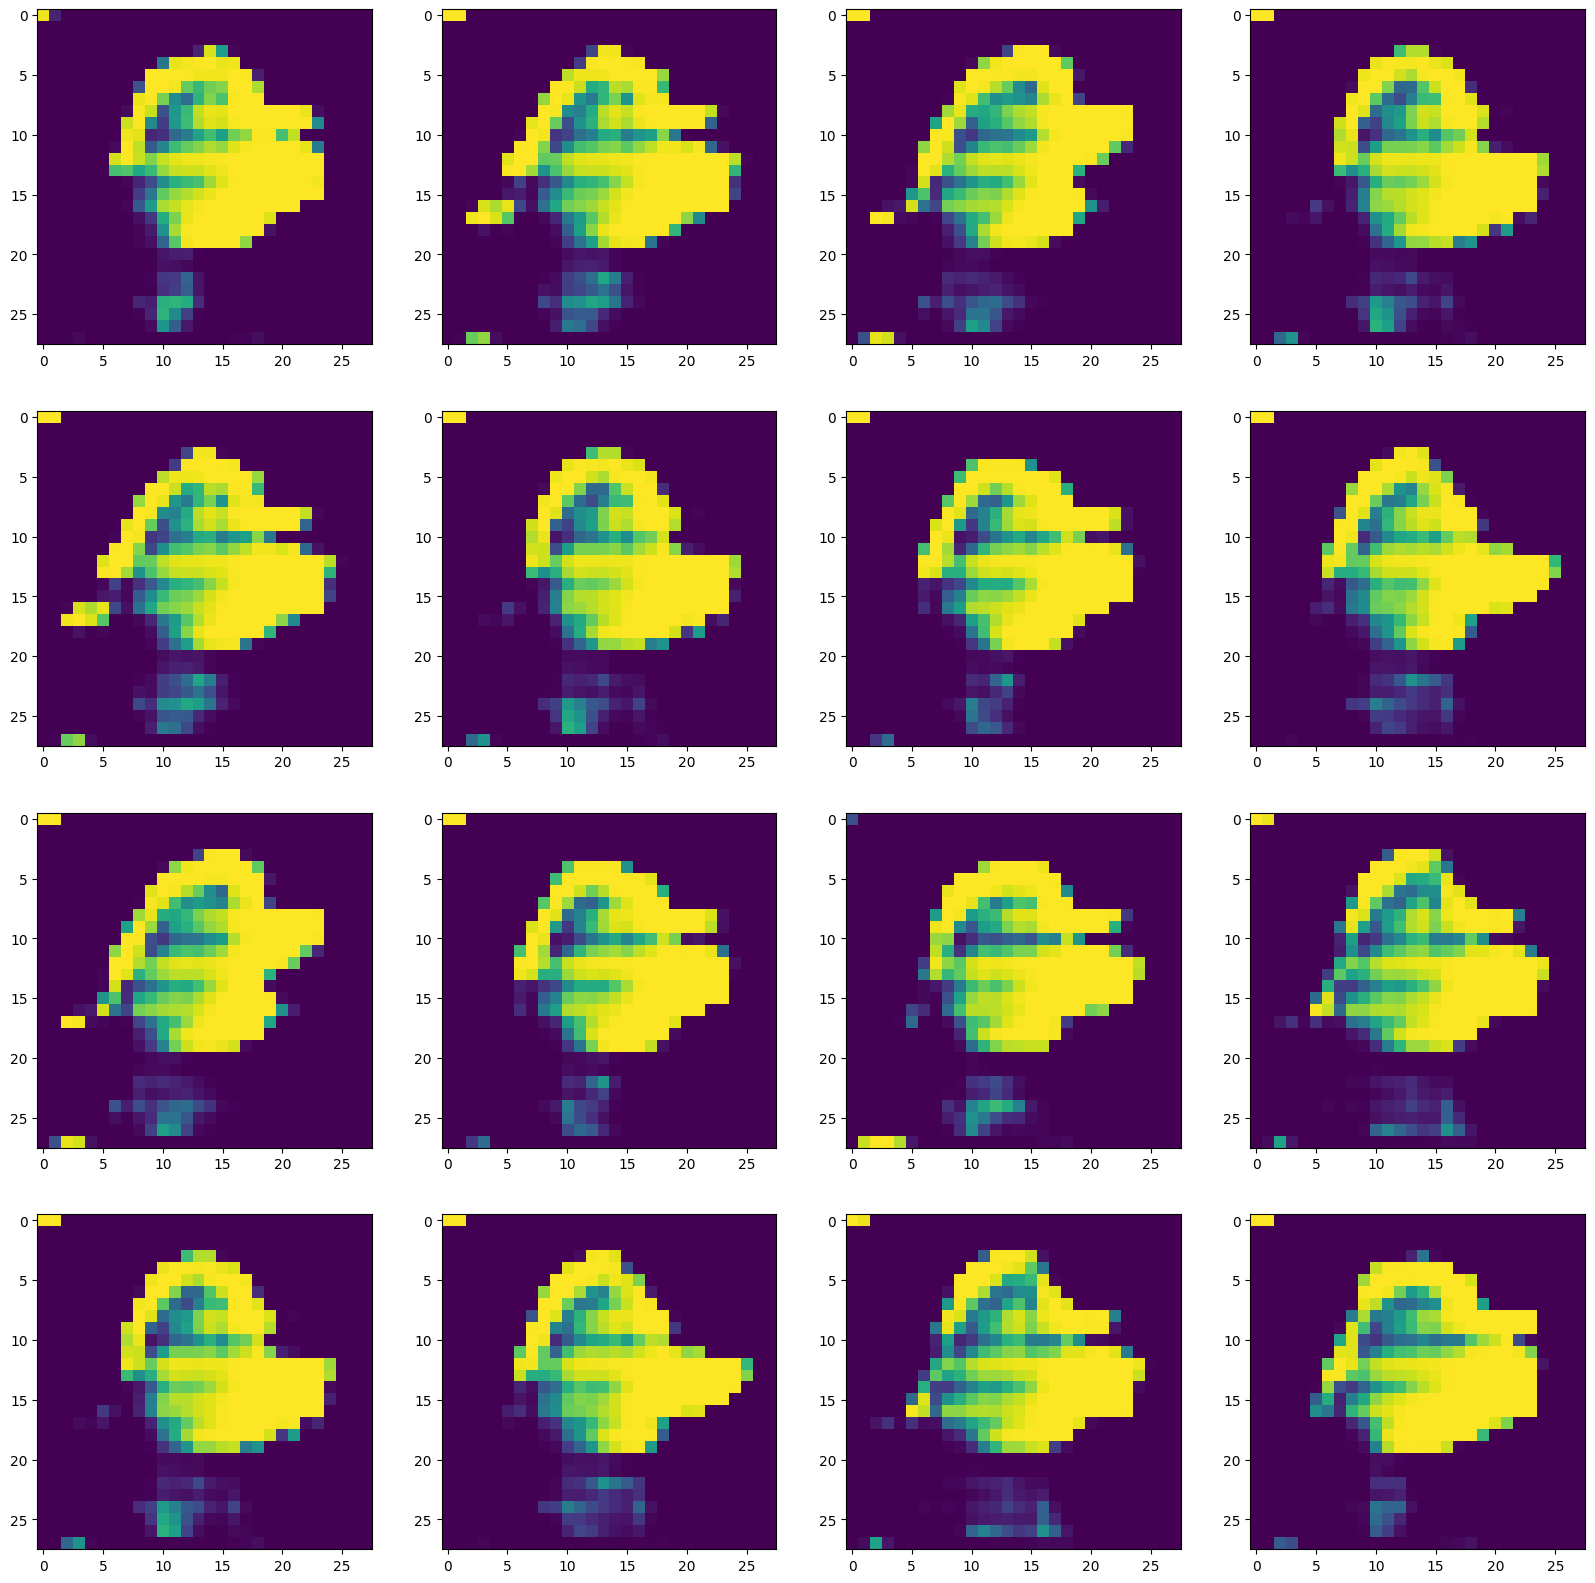

In [ ]:
imgs=generator.predict(tf.random.normal((16,128,1)))
dig,ax=plt.subplots(ncols=4,nrows=4,figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
